In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t as tstat

In [12]:
def ste(_x):
    return stats.sem(_x, axis=None, ddof=(len(_x)-1.))

def regression(x, y, visualize=True, print_stats=True, p=0.95, two_tailed=True, extent=None):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    print('p={0}, r={1}, y={2}*x+{3}, ste={4}'.format(p_value, r_value, slope, intercept, std_err))
    
    mean_x = np.mean(x)
    n = len(x)
    p_tailed = p
    if two_tailed:
        p_tailed = p + ((1. - p) / 2.)
    t = tstat.ppf(p_tailed, n - 1.)
    s_err = ste(y)
    
    z = np.polyfit(x,y,1)
    p_x = np.arange(np.min(x),np.max(x)+1,1)
    
    confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))
    
    p_y = z[0]*p_x+z[0]

    lower = p_y - abs(confs)
    upper = p_y + abs(confs)
    
    c_x = x
    c_y = [slope * i + intercept for i in x]

    if visualize:
        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.title('Linear regression and confidence limits')

        plt.plot(x,y,'bo',label='Sample observations')
        plt.plot(c_x,c_y,'r-',label='Regression line')

        tail = 'one-tailed'
        if two_tailed:
            tail = 'two-tailed'

        plt.plot(p_x,lower,'b--',label='Lower confidence limit ({0}% {1})'.format(p, tail))
        plt.plot(p_x,upper,'b--',label='Upper confidence limit ({0}% {1})'.format(p, tail))

        if extent is None:
            extent = [[min(x), max(x)], [min(y), max(y)]]
        plt.xlim(*extent[0])
        plt.ylim(*extent[1])

        plt.legend(loc=0)
        leg = plt.gca().get_legend()
        ltext = leg.get_texts()
        plt.setp(ltext, fontsize=10)

        plt.show()

p=0.0214146234476, r=0.783549953436, y=0.780679703568*x+0.68400313408, ste=0.252727240137


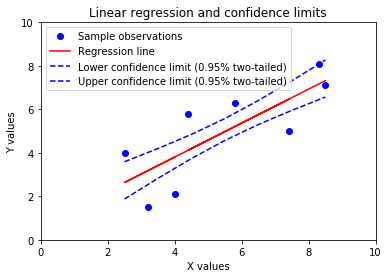

In [13]:
# example data
x = np.array([4.0,2.5,3.2,5.8,7.4,4.4,8.3,8.5])
y = np.array([2.1,4.0,1.5,6.3,5.0,5.8,8.1,7.1])
regression(x, y, extent=[[0, 10], [0, 10]])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [15]:
def t_test(a, b, visualize=True, print_stats=True):
    t, p = scipy.stats.ttest_ind(a, b, equal_var=False)
    
    print('t={0}, p={1}'.format(t, p))
    
    n_a = len(a)
    n_b = len(b)
    mean_a = np.mean(a)
    mean_b = np.mean(b)
    ste_a = ste(a)
    ste_b = ste(b)

    fig, ax = plt.subplots()
    rects1 = ax.bar(np.arange(2), (mean_a, mean_b), 0.8, color='r', yerr=(ste_a, ste_b))

    plt.show()

t=0.44977795236, p=0.659756028292


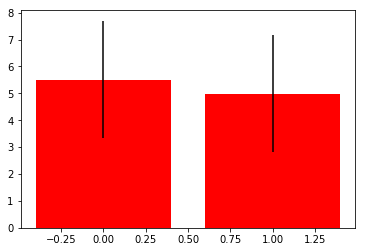

In [16]:
t_test(x, y)

In [17]:
import statsmodels.sandbox.stats.multicomp as multi

In [18]:
def multiple_compare_columns(a, b, a_cols, b_cols, p=0.95):
    '''
    From: http://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.multipletests.html#statsmodels.sandbox.stats.multicomp.multipletests
    `bonferroni` : one-step correction
    `sidak` : one-step correction
    `holm-sidak` : step down method using Sidak adjustments
    `holm` : step-down method using Bonferroni adjustments
    `simes-hochberg` : step-up method  (independent)
    `hommel` : closed method based on Simes tests (non-negative)
    `fdr_bh` : Benjamini/Hochberg  (non-negative)
    `fdr_by` : Benjamini/Yekutieli (negative)
    `fdr_tsbh` : two stage fdr correction (non-negative)
    `fdr_tsbky` : two stage fdr correction (non-negative)
    '''
    
    reject, pvals, alphacSidak, alphacBonf = multi.multipletests([0.1, 0.12, 0.13, 0.04], alpha=0.05, method='simes-hochberg')
    
    return reject, pvals, alphacSidak, alphacBonf

In [19]:
multiple_compare_columns(0, 0, 0, 0)

(array([False, False, False, False], dtype=bool),
 array([ 0.13,  0.13,  0.13,  0.13]),
 0.012741455098566168,
 0.0125)